In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [122]:
data = pd.read_csv('Optima_Airlines_data.csv')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Airline                   372 non-null    object 
 1   Origin airport            372 non-null    object 
 2   Destination airport       372 non-null    object 
 3   Departure date            372 non-null    object 
 4   Scheduled departure time  372 non-null    object 
 5   Scheduled arrival time    372 non-null    object 
 6   Actual arrival time       372 non-null    object 
 7   Arrival delay in minutes  372 non-null    object 
 8   Delay indicator           372 non-null    object 
 9   Day of Week               372 non-null    int64  
 10  Route Code                372 non-null    int64  
 11  Number of passengers      248 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 35.0+ KB


In [168]:
quanta = data.loc[data['Airline'] == 'Quanta']
optima = data.loc[data['Airline'] == 'Optima']

In [169]:
def process(data):
    df = data.copy()
    df = df[['Arrival delay in minutes', 'Delay indicator', 'Day of Week', 'Route Code']]
    df['Arrival delay in minutes'] = df['Arrival delay in minutes'].replace('N\A', 100).astype(float).astype(int)
    df['Delay indicator'] = df['Delay indicator'].replace('N\A', 1).astype(float).astype(int)
    return df

In [170]:
quanta = process(quanta)
optima = process(optima)

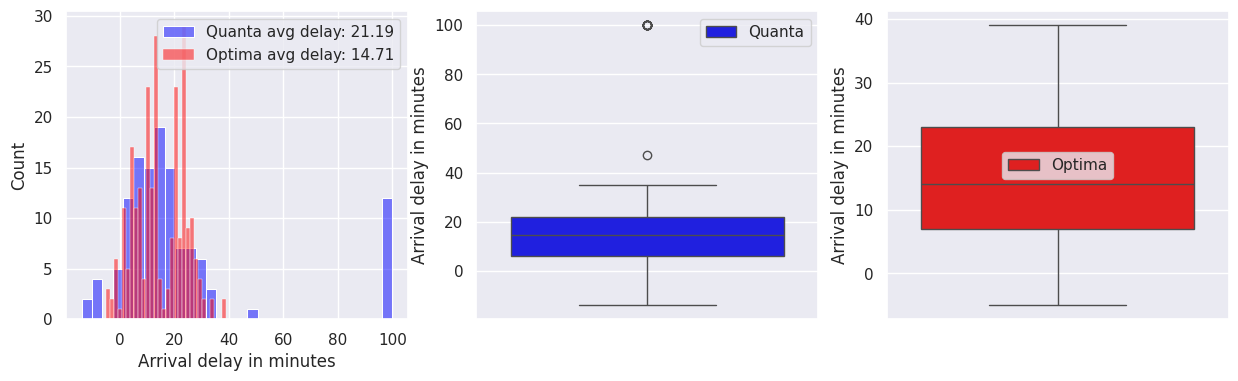

In [171]:
plt.figure(figsize=(15,4))


plt.subplot(1,3,1)
sns.histplot(quanta['Arrival delay in minutes'], bins=30, label = f'Quanta avg delay: {quanta["Arrival delay in minutes"].mean().round(2)}', color='blue', alpha=0.5)
sns.histplot(optima['Arrival delay in minutes'], bins=30, label = f'Optima avg delay: {optima["Arrival delay in minutes"].mean().round(2)}', color='red', alpha=0.5)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(quanta['Arrival delay in minutes'], label = f'Quanta', color='blue')
plt.legend()

plt.subplot(1,3,3)
sns.boxplot(optima['Arrival delay in minutes'], label = f'Optima', color='red')

plt.legend()
plt.show()

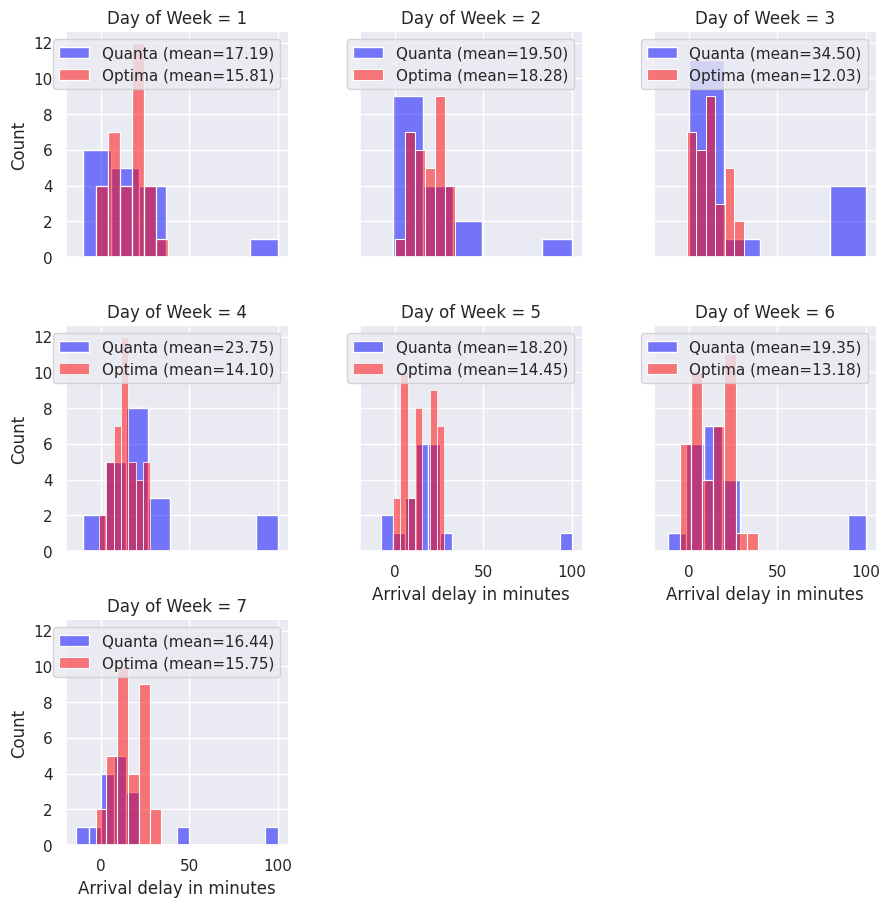

<Figure size 1200x1000 with 0 Axes>

In [172]:
g = sns.FacetGrid(quanta, col="Day of Week", col_wrap=3)

def plot_histogram_with_mean(data1, data2, color1, color2, label1, label2, **kwargs):
    sns.histplot(data=data1, x="Arrival delay in minutes", color=color1, alpha=0.5, label=f'{label1} (mean={data1["Arrival delay in minutes"].mean():.2f})', **kwargs)
    sns.histplot(data=data2, x="Arrival delay in minutes", color=color2, alpha=0.5, label=f'{label2} (mean={data2["Arrival delay in minutes"].mean():.2f})', **kwargs)

plt.figure(figsize=(12,10))

for i, ax in enumerate(g.axes.flat):
    day_of_week = g.col_names[i]
    
    quanta_day = quanta[quanta["Day of Week"] == day_of_week]
    optima_day = optima[optima["Day of Week"] == day_of_week]
    
    plot_histogram_with_mean(quanta_day, optima_day, 'blue', 'red', 'Quanta', 'Optima', ax=ax)
    
    ax.legend()

plt.show()

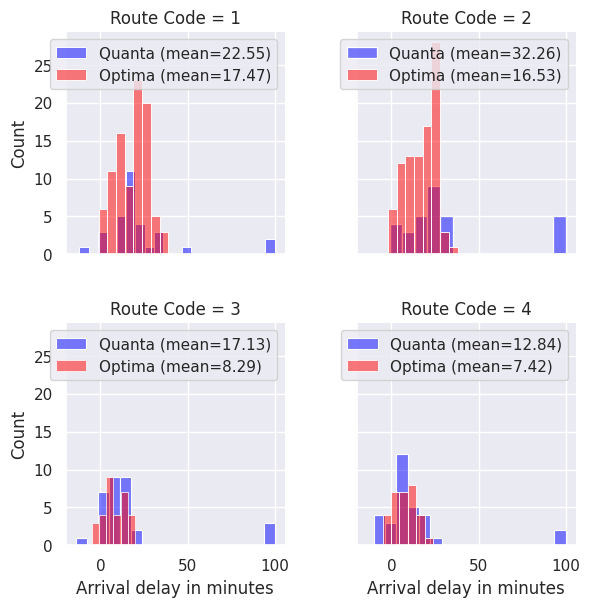

<Figure size 1600x1600 with 0 Axes>

In [173]:
g = sns.FacetGrid(quanta, col="Route Code", col_wrap=2)

plt.figure(figsize=(16,16))

for i, ax in enumerate(g.axes.flat):
    route_code = g.col_names[i]
    
    quanta_day = quanta[quanta["Route Code"] == route_code]
    optima_day = optima[optima["Route Code"] == route_code]
    
    plot_histogram_with_mean(quanta_day, optima_day, 'blue', 'red', 'Quanta', 'Optima', ax=ax)
    
    ax.legend()

plt.show()